In [126]:
from pathlib import Path
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
labels_file = Path("/home/sdejong/pmchhg/labels.csv")
splits_dir = Path("/home/sdejong/pmchhg/images-tif/splits-final")
diagnoses = "medulloblastoma+pilocytic-astrocytoma"
name = "pmchhg"
ext = ".png"

In [36]:
df_labels = pd.read_csv(labels_file)
df_labels

,case_id,diagnosis,location,age(yr),sex,Unnamed: 5
0,PMC_HHG_3,medulloblastoma,fourth ventricle,8.00,m,NaN
1,PMC_HHG_9,pilocytic astrocytoma,suprasellar,0.67,f,NaN
2,PMC_HHG_11,craniopharyngioma,suprasellar,1.60,f,NaN
3,PMC_HHG_12,pilocytic astrocytoma,cerebellum+brainstem,2.00,m,NaN
4,PMC_HHG_15,medulloblastoma,cerebellum,12.00,f,NaN
5,PMC_HHG_16,pilocytic astrocytoma,fourth ventricle,4.00,m,NaN
6,PMC_HHG_19,subependymal giant cell astrocytoma,intraventricular+supratentorial,14.00,m,NaN
7,PMC_HHG_22,ganglioglioma,frontal lobe+insula,11.00,f,NaN
8,PMC_HHG_25,craniopharyngioma,suprasellar,11.00,m,NaN
9,PMC_HHG_26,craniopharyngioma,suprasellar,13.00,m,NaN


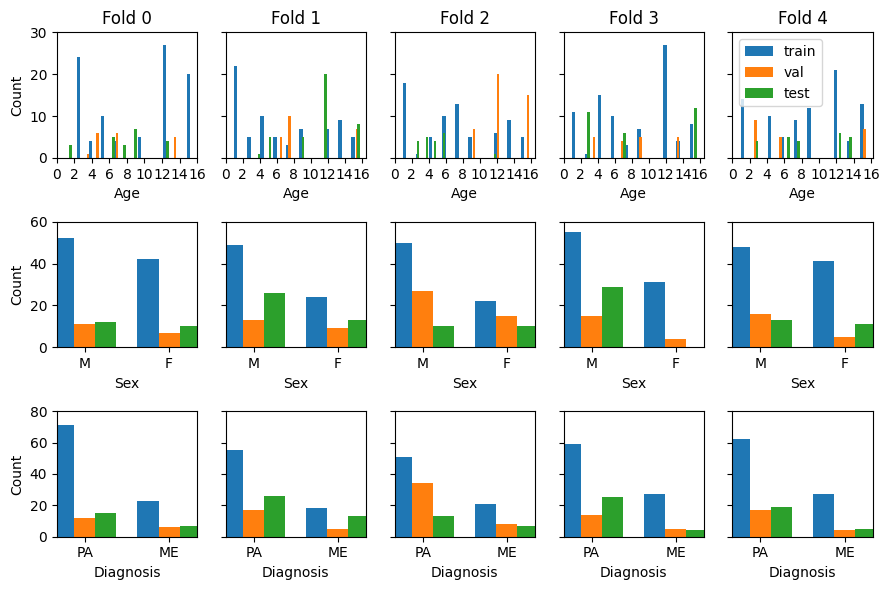

In [144]:
plt.style.use(style="default")
fig, axs = plt.subplots(3, 5, figsize=(9, 6), sharey="row")

for i, (split, subfold, fold) in enumerate(product(["train", "val", "test"], range(1), range(5))):
    i = fold
    splits_file = splits_dir / f"{diagnoses}_{name}_{split}-subfold-{subfold}-fold-{fold}.csv"
    splits_df = pd.read_csv(splits_file, names=["path", "case_id", "img_id", "target", "location"])
    splits_df["path"] = splits_df["path"].str.replace(".tif", ".png", regex=True)
    merged = splits_df.merge(df_labels, left_on="case_id", right_on="case_id")
    
    if split == "train":
        align = - 1 / 4
    elif split == "val":
        align = 0
    else:
        align = 1 / 4
    # axs[0][i].bar(np.arange(merged["age(yr)"].max()) + align, merged["age(yr)"], label=split, width=1/4)
    # merged["age(yr)"].plot.bar(ax=axs[0][i])
    axs[0][i].hist(merged["age(yr)"] + align, rwidth=1/4, label=split)
    # axs[0][i].set_xlim([-1, 100])
    axs[0][i].set_ylim([0, 30])
    axs[0][i].set_xticks(np.arange(0, 18, 2))
    axs[0][i].set_title(f"Fold {fold}")
    axs[0][i].set_xlabel("Age")
    
    # density = st.gaussian_kde(merged["age(yr)"])
    # x = np.arange(0, 18, 0.01)
    # axs[0][i].plot(x, density(x) * merged["age(yr)"].max())

    axs[1][i].bar(np.arange(len(merged["sex"].value_counts().index)) + align, merged["sex"].value_counts().values, label=split, width=1 / 4)
    axs[1][i].set_ylim([0, 60])
    axs[1][i].set_xlim([-1/3, 4/3])
    axs[1][i].set_xticks([0, 1])
    axs[1][i].set_xticklabels(["M", "F"])
    # axs[i].set_title(f"Fold {fold}")
    axs[1][i].set_xlabel("Sex")

    axs[2][i].bar(np.arange(len(merged["diagnosis"].value_counts().index)) + align, merged["diagnosis"].value_counts().values, label=split, width=1 / 4)
    axs[2][i].set_ylim([0, 80])
    axs[2][i].set_xlim([-1/3, 4/3])
    axs[2][i].set_xticks([0, 1])
    axs[2][i].set_xticklabels(["PA", "ME"])
    # axs[2][i].set_xticklabels(["M", "F"])
    # axs[i].set_title(f"Fold {fold}")
    axs[2][i].set_xlabel("Diagnosis")

axs[0][0].set_ylabel("Count")
axs[1][0].set_ylabel("Count")
axs[2][0].set_ylabel("Count")
axs[0][4].legend(loc="upper left")
fig.tight_layout()
plt.savefig("outputs/14/age-and-sex-diagnosis-per-fold.pdf", dpi=300)

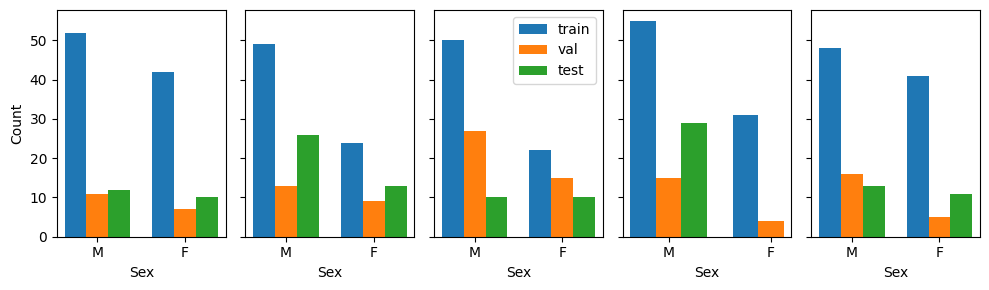

In [91]:
plt.style.use(style="default")
fig, axs = plt.subplots(1, 5, figsize=(10, 3), sharey=True)

for i, (split, subfold, fold) in enumerate(product(["train", "val", "test"], range(1), range(5))):
    i = fold
    splits_file = splits_dir / f"{diagnoses}_{name}_{split}-subfold-{subfold}-fold-{fold}.csv"
    splits_df = pd.read_csv(splits_file, names=["path", "case_id", "img_id", "target", "location"])
    splits_df["path"] = splits_df["path"].str.replace(".tif", ".png", regex=True)
    merged = splits_df.merge(df_labels, left_on="case_id", right_on="case_id")

    if split == "train":
        align = - 1 / 4
    elif split == "val":
        align = 0
    else:
        align = 1 / 4
    axs[i].bar(np.arange(len(merged["sex"].value_counts().index)) + align, merged["sex"].value_counts().values, label=split, width=1 / 4)
    # axs[i].set_xlim([0, 16])
    # axs[i].set_ylim([0, 30])
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(["M", "F"])
    # axs[i].set_title(f"Fold {fold}")
    axs[i].set_xlabel("Sex")

axs[0].set_ylabel("Count")
axs[2].legend()
fig.tight_layout()
plt.savefig("outputs/14/sex-per-fold.pdf", dpi=300)